In [6]:
# 9장
import pandas as pd       # 데이터프레임 및 데이터 처리
import numpy as np        # 수치 계산 및 배열 처리
import seaborn as sns     # 통계적 데이터 시각화
import matplotlib.pyplot as plt  # 그래프 시각화

plt.rcParams.update({'font.family': 'AppleGothic'}) # 폰트 설정

In [27]:
# pyreadstat 패키지 설치
!pip install pyreadstat
# pyreadstat 패키지의 설치 정보 확인
!pip show pyreadstat

Name: pyreadstat
Version: 1.2.8
Summary: Reads and Writes SAS, SPSS and Stata files into/from pandas data frames.
Home-page: https://github.com/Roche/pyreadstat
Author: Otto Fajardo
Author-email: pleasecontactviagithub@notvalid.com
License: Apache License Version 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: pandas
Required-by: 


In [8]:
# SPSS 통계 패키지 전용 파일 데이터 불러오기
# SPSS(Statistical Package for the Social Sciences)는 사회 과학용 통계 패키지로 IBM 소유 패키지
raw_welfare = pd.read_spss('week9_Koweps_hpwc14_2019_beta2.sav') # 파일 커서 github에 못 올림
# 데이터 분석 작업용 복사본 만들기
welfare = raw_welfare.copy()

In [10]:
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경  
welfare = welfare.rename(
   columns = {'h14_g3'     : 'sex',              # 성별
              'h14_g4'     : 'birth',            # 태어난 연도
              'h14_g10'    : 'marriage_type',    # 혼인 상태
              'h14_g11'    : 'religion',         # 종교
              'p1402_8aq1' : 'income',           # 일한달의 월 평균 임금
              'h14_eco9'   : 'code_job',         # 직종
              'h14_reg7'   : 'code_region'       # 7개 권역별 지역 구분
             })

In [12]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region
0  2.0  1945.0            2.0       1.0     NaN       NaN          1.0

In [14]:
# 성별에 따른 월급 차이 - 성별에 따라 월급에 차이가 있을까?
welfare.groupby('sex').agg(월급평균 = ('income', 'mean'))
# 1을 male로, 2를 female로 변경하자
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

<Axes: xlabel='sex', ylabel='월급평균'>

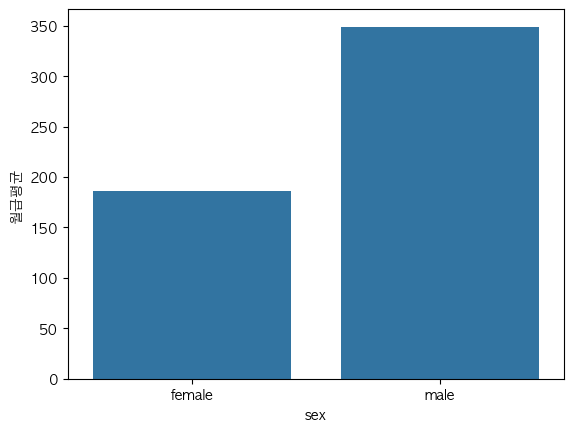

In [16]:
# welfare[['sex']]
result = welfare.groupby('sex').agg(월급평균 = ('income', 'mean'))
sns.barplot(data = result, x = 'sex', y = '월급평균')

In [76]:
# 1. 결측치가 있는가?
# 2. 결측치 빼고 할거냐?
# 3. 값을 변경
welfare['sex'].unique() # 고유한 값 출력
welfare['sex'].value_counts() # 값의 개수 카운트
welfare['sex'].isna().sum() # 결측치의 개수를 계산

0

<Axes: xlabel='income', ylabel='Count'>

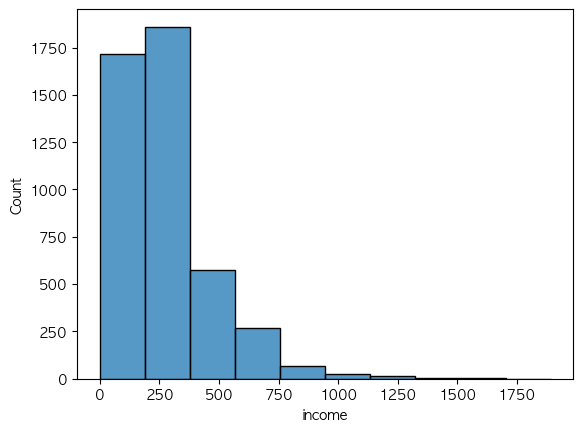

In [84]:
# welfare['income'].unique()
welfare['income'].describe() # income의 요약 통계 정보 확인
sns.histplot(data = welfare, x = 'income', bins=10) # income 데이터 분포 시각화

In [90]:
# 월급 결측치 개수 계산
welfare['income'].isna().sum()

9884

<Axes: xlabel='sex', ylabel='평균월급'>

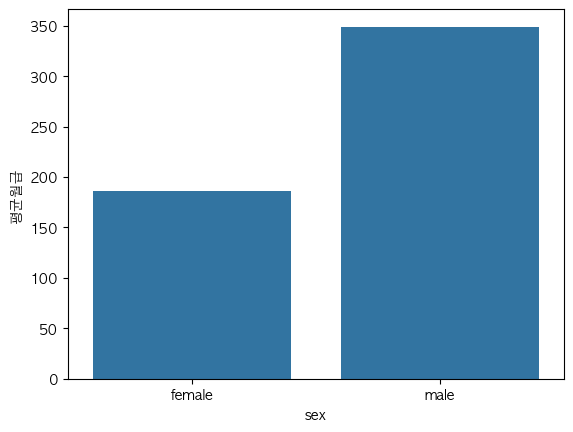

In [18]:
# 성별에 따른 월급 평균을 구해보자
result_1 = welfare.dropna(subset=['income']).groupby('sex').agg(평균월급 = ('income', 'mean'))
# dropna(subset=['income']) : 결측치가 있는 행 제거
sns.barplot(data = result_1, x = 'sex', y = '평균월급')

In [24]:
# dropna를 쓰지 않아도 결과는 같긴 함. 하지만 dropna의 과정을 거치면 데이터의 오류가 생기지 않으니 꼭 하는 걸 추천
result_2 = welfare.groupby('sex').agg(평균월급 = ('income', 'mean'))
# sns.barplot(data = result_2, x = 'sex', y = '평균월급')

In [101]:
# 나이와 월급과의 관계 - 몇 살 때 월급이 가장 많을까?
# 연령대별 월급 차이 - 어느 연령대의 월급이 가장 많을까?
# 1. 나이 
# 2. 나이 -> 연령대 새로운 컬럼 추가
# 3. 연령대 월급 분석
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']].head()

sex   birth  marriage_type  religion  income  code_job  code_region
0  female  1945.0            2.0       1.0     NaN       NaN          1.0
1    male  1948.0            2.0       2.0     NaN       NaN          1.0
2    male  1942.0            3.0       1.0   107.0     762.0          1.0
3    male  1962.0            1.0       1.0   192.0     855.0          1.0
4  female  1963.0            1.0       1.0     NaN       NaN          1.0

In [103]:
# age 컬럼 추가 - 2가지 방법 알고 있어야함!
welfare['age'] = 2019 - welfare['birth'] + 1
welfare = welfare.assign(age2 = 2019 - welfare['birth'] + 1)

In [107]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'age2']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region  \
0  female  1945.0            2.0       1.0     NaN       NaN          1.0   

    age  age2  
0  75.0  75.0

In [113]:
# ageg - young, middle, old
welfare['ageg'] = np.where(welfare['age'] < 30, 'young', 
                  np.where(welfare['age'] < 60, 'middle', 'old'))

In [115]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'age2', 'ageg']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region  \
0  female  1945.0            2.0       1.0     NaN       NaN          1.0   

    age  age2 ageg  
0  75.0  75.0  old

In [117]:
# assign 방식
welfare = welfare.assign(ageg2 = np.where(welfare['age'] < 30, 'young', 
                                  np.where(welfare['age'] < 60, 'middle', 'old')))

In [119]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'age2', 'ageg', 'ageg2']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region  \
0  female  1945.0            2.0       1.0     NaN       NaN          1.0   

    age  age2 ageg ageg2  
0  75.0  75.0  old   old

In [133]:
result = welfare.dropna(subset=['income'])\
                .groupby(['ageg', 'sex'], as_index=False).agg(평균월급 = ('income', 'mean'), 
                                                             최대월급 = ('income', 'max'),
                                                             최소월급 = ('income', 'min'),
                                                             돈버는사람수 = ('income', 'count'))
result

ageg     sex        평균월급    최대월급  최소월급  돈버는사람수
0  middle  female  230.481735  1008.0   0.0    1314
1  middle    male  409.541228  1892.0  30.0    1613
2     old  female   90.228896   667.0   2.0     616
3     old    male  204.570231  1113.0   4.0     477
4   young  female  189.822222   500.0   0.0     315
5   young    male  204.909548   583.0  25.0     199

<Axes: xlabel='sex', ylabel='평균월급'>

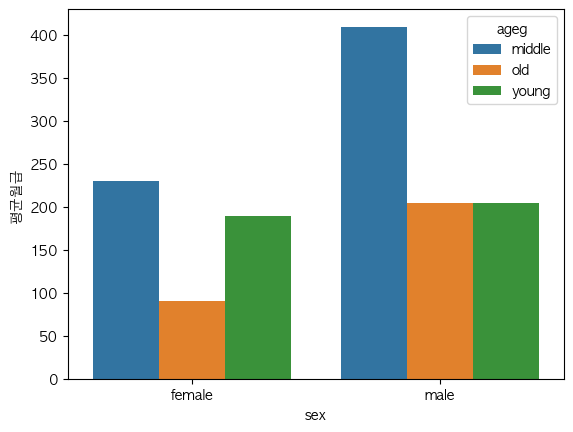

In [139]:
sns.barplot(data = result, x = 'sex', y = '평균월급', hue='ageg')

In [161]:
# 새로운 변수 추가 - '나이', '연령그룹'
# 연령그룹 25이하, 50이하, 75이하, 75이상
welfare['나이'] = 2019 - welfare['birth'] + 1
welfare['연령그룹'] = np.where(welfare['나이'] < 25, '25이하', 
                    np.where(welfare['나이'] < 50, '50이하',
                    np.where(welfare['나이'] < 75, '75이하', '75이상')))
# 연령그룹, 남녀로 나눠서 평균 월급, max월급, min월급, 사람수 구할것
result1 = welfare.groupby(['연령그룹', 'sex'], as_index=False).agg(평균월급 = ('income', 'mean'),
                                                         max월급 = ('income', 'max'),
                                                         min월급 = ('income', 'min'),
                                                         사람수 = ('income', 'count'))
# 평균웗급의 그래프 그려볼 것
sns.barplot(data = result1, x = 'sex', y = '평균월급', hue='연령그룹')

<Axes: xlabel='sex', ylabel='평균월급'>